<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/CS450/blob/master/Module_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a neural network that can predict the number of bicycle rentals for a given day

### Import data

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
bikes.tail(10)

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
17369,17369,17370,12/31/12,1,14,0,1,2,0.45,15,5.16,1.9982,62,185
17370,17370,17371,12/31/12,1,15,0,1,2,0.45,9,5.16,3.0014,69,246
17371,17371,17372,12/31/12,1,16,0,1,2,0.48,13,4.22,1.0016,30,184
17372,17372,17373,12/31/12,1,17,0,1,2,0.48,6,4.22,3.0014,14,150
17373,17373,17374,12/31/12,1,18,0,1,2,0.48,9,4.22,1.9982,10,112
17374,17374,17375,12/31/12,1,19,0,1,2,0.60,11,4.22,1.0016,11,108
17375,17375,17376,12/31/12,1,20,0,1,2,0.60,11,4.22,1.0016,8,81
17376,17376,17377,12/31/12,1,21,0,1,1,0.60,11,4.22,1.0016,7,83
17377,17377,17378,12/31/12,1,22,0,1,1,0.56,9,4.22,1.9982,13,48
17378,17378,17379,12/31/12,1,23,0,1,1,0.65,9,4.22,1.9982,12,37


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17379 non-null  int64  
 1   instant       17379 non-null  int64  
 2   dteday        17379 non-null  object 
 3   season        17379 non-null  int64  
 4   hr            17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   workingday    17379 non-null  int64  
 7   weathersit    17379 non-null  int64  
 8   hum           17379 non-null  float64
 9   windspeed     17379 non-null  int64  
 10  temp_c        17379 non-null  float64
 11  feels_like_c  17379 non-null  float64
 12  casual        17379 non-null  int64  
 13  registered    17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


# **Basics with Keras**

# *Regression*

### Import the libraries

In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Clean the data:

#### Check for NAs

In [ ]:
bikes.isna().sum()

Unnamed: 0      0
instant         0
dteday          0
season          0
hr              0
holiday         0
workingday      0
weathersit      0
hum             0
windspeed       0
temp_c          0
feels_like_c    0
casual          0
registered      0
dtype: int64

In [ ]:
# dataset = bikes.dropna()
# bikes.info()

No NAs in dataset.


#### Create new columns

The "dteday" column is really categorical, not numeric. Let's create a more useful column from it and encode it.

In [ ]:
#Convert dteday column into time
bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes.head()

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,0,1,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1,2,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,2,3,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,3,4,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,4,5,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    17379 non-null  int64         
 1   instant       17379 non-null  int64         
 2   dteday        17379 non-null  datetime64[ns]
 3   season        17379 non-null  int64         
 4   hr            17379 non-null  int64         
 5   holiday       17379 non-null  int64         
 6   workingday    17379 non-null  int64         
 7   weathersit    17379 non-null  int64         
 8   hum           17379 non-null  float64       
 9   windspeed     17379 non-null  int64         
 10  temp_c        17379 non-null  float64       
 11  feels_like_c  17379 non-null  float64       
 12  casual        17379 non-null  int64         
 13  registered    17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 1.9 MB


##### Create Day of Week Column

In [ ]:
#Create day of week column
bikes['day_of_week'] = bikes['dteday'].dt.day_name()
bikes

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week
0,0,1,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,Saturday
1,1,2,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,Saturday
2,2,3,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,Saturday
3,3,4,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,Saturday
4,4,5,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17374,17375,2012-12-31,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday
17375,17375,17376,2012-12-31,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday
17376,17376,17377,2012-12-31,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday
17377,17377,17378,2012-12-31,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday


In [ ]:
#make dteday column as a string instead of datetime64 type to be able to use str. functions later
bikes["dteday"] = bikes['dteday'].astype(str)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17379 non-null  int64  
 1   instant       17379 non-null  int64  
 2   dteday        17379 non-null  object 
 3   season        17379 non-null  int64  
 4   hr            17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   workingday    17379 non-null  int64  
 7   weathersit    17379 non-null  int64  
 8   hum           17379 non-null  float64
 9   windspeed     17379 non-null  int64  
 10  temp_c        17379 non-null  float64
 11  feels_like_c  17379 non-null  float64
 12  casual        17379 non-null  int64  
 13  registered    17379 non-null  int64  
 14  day_of_week   17379 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 2.0+ MB


##### Create Year Column

In [ ]:
#Create Year column
bikes["year"] = bikes["dteday"].str.split("-").str.get(0)
bikes.tail(10)

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week,year
17369,17369,17370,2012-12-31,1,14,0,1,2,0.45,15,5.16,1.9982,62,185,Monday,2012
17370,17370,17371,2012-12-31,1,15,0,1,2,0.45,9,5.16,3.0014,69,246,Monday,2012
17371,17371,17372,2012-12-31,1,16,0,1,2,0.48,13,4.22,1.0016,30,184,Monday,2012
17372,17372,17373,2012-12-31,1,17,0,1,2,0.48,6,4.22,3.0014,14,150,Monday,2012
17373,17373,17374,2012-12-31,1,18,0,1,2,0.48,9,4.22,1.9982,10,112,Monday,2012
17374,17374,17375,2012-12-31,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday,2012
17375,17375,17376,2012-12-31,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday,2012
17376,17376,17377,2012-12-31,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday,2012
17377,17377,17378,2012-12-31,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday,2012
17378,17378,17379,2012-12-31,1,23,0,1,1,0.65,9,4.22,1.9982,12,37,Monday,2012


##### Create Month column

In [ ]:
#Create month column
bikes["month"] = bikes["dteday"].str.split("-").str.get(1)
bikes

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week,year,month
0,0,1,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,Saturday,2011,01
1,1,2,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,Saturday,2011,01
2,2,3,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,Saturday,2011,01
3,3,4,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,Saturday,2011,01
4,4,5,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,Saturday,2011,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17374,17375,2012-12-31,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday,2012,12
17375,17375,17376,2012-12-31,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday,2012,12
17376,17376,17377,2012-12-31,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday,2012,12
17377,17377,17378,2012-12-31,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday,2012,12


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17379 non-null  int64  
 1   instant       17379 non-null  int64  
 2   dteday        17379 non-null  object 
 3   season        17379 non-null  int64  
 4   hr            17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   workingday    17379 non-null  int64  
 7   weathersit    17379 non-null  int64  
 8   hum           17379 non-null  float64
 9   windspeed     17379 non-null  int64  
 10  temp_c        17379 non-null  float64
 11  feels_like_c  17379 non-null  float64
 12  casual        17379 non-null  int64  
 13  registered    17379 non-null  int64  
 14  day_of_week   17379 non-null  object 
 15  year          17379 non-null  object 
 16  month         17379 non-null  object 
dtypes: float64(3), int64(10), object(4)
memory usage: 2.3+ MB


In [ ]:
#Get rid of 0 at the beginning of the numbers
f = lambda x: x if (x[0] != '0') else x[1]
bikes["month"] = list(map(f,bikes["month"]))
bikes.month.value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
11    1437
9     1437
1     1429
2     1341
Name: month, dtype: int64

##### Create Target Column

In [ ]:
#first let's create the target column (casual + registered users)
#Get rid of 0 at the beginning of the numbers
f = lambda x,y: x + y
bikes["target"] = list(map(f,bikes["casual"],bikes["registered"]))
bikes

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week,year,month,target
0,0,1,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,Saturday,2011,1,16
1,1,2,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,Saturday,2011,1,40
2,2,3,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,Saturday,2011,1,32
3,3,4,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,Saturday,2011,1,13
4,4,5,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,Saturday,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17374,17375,2012-12-31,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday,2012,12,119
17375,17375,17376,2012-12-31,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday,2012,12,89
17376,17376,17377,2012-12-31,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday,2012,12,90
17377,17377,17378,2012-12-31,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday,2012,12,61


#### Encode categorical features

In [ ]:
#both day_of_week, year and month are objects, will have to make them integers
bikes['year'] = bikes['year'].astype('int64')
bikes['month'] = bikes['month'].astype('int64')

# #Su = 0
# #Mo = 1
# #Tue = 2
# #Wed = 3
# #Thur = 4
# #Fri = 5
# #Sa = 6
# bikes["day_of_week_numeric"] = bikes["day_of_week"].map({'Sunday': 0,  
#                                                          'Monday': 1, 
#                                                          'Tuesday': 2, 
#                                                          'Wednesday': 3, 
#                                                          'Thursday': 4, 
#                                                          'Friday': 5,
#                                                          'Saturday': 6})
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17379 non-null  int64  
 1   instant       17379 non-null  int64  
 2   dteday        17379 non-null  object 
 3   season        17379 non-null  int64  
 4   hr            17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   workingday    17379 non-null  int64  
 7   weathersit    17379 non-null  int64  
 8   hum           17379 non-null  float64
 9   windspeed     17379 non-null  int64  
 10  temp_c        17379 non-null  float64
 11  feels_like_c  17379 non-null  float64
 12  casual        17379 non-null  int64  
 13  registered    17379 non-null  int64  
 14  day_of_week   17379 non-null  object 
 15  year          17379 non-null  int64  
 16  month         17379 non-null  int64  
 17  target        17379 non-null  int64  
dtypes: float64(3), int64(13), 

In [ ]:
bikes

,Unnamed: 0,instant,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week,year,month,target
0,0,1,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,Saturday,2011,1,16
1,1,2,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,Saturday,2011,1,40
2,2,3,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,Saturday,2011,1,32
3,3,4,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,Saturday,2011,1,13
4,4,5,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,Saturday,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17374,17375,2012-12-31,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday,2012,12,119
17375,17375,17376,2012-12-31,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday,2012,12,89
17376,17376,17377,2012-12-31,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday,2012,12,90
17377,17377,17378,2012-12-31,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday,2012,12,61


In [ ]:
list(bikes.columns) 

['Unnamed: 0',
 'instant',
 'dteday',
 'season',
 'hr',
 'holiday',
 'workingday',
 'weathersit',
 'hum',
 'windspeed',
 'temp_c',
 'feels_like_c',
 'casual',
 'registered',
 'day_of_week',
 'year',
 'month',
 'target']

#### Create data frame with useful features for predictions

In [ ]:
#create data frame where only useful features for Neural Networks are left
useful_bikes = bikes[['season',
 'hr',
 'holiday',
 'workingday',
 'weathersit',
 'hum',
 'windspeed',
 'temp_c',
 'feels_like_c',
 'casual',
 'registered',
 'day_of_week',
 'year',
 'month',
 'target']]

useful_bikes

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,day_of_week,year,month,target
0,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,Saturday,2011,1,16
1,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,Saturday,2011,1,40
2,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,Saturday,2011,1,32
3,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,Saturday,2011,1,13
4,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,Saturday,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,Monday,2012,12,119
17375,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,Monday,2012,12,89
17376,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,Monday,2012,12,90
17377,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,Monday,2012,12,61


In [ ]:
useful_bikes = pd.get_dummies(useful_bikes, prefix='', prefix_sep='', drop_first=True)
useful_bikes['year_encoded'] = pd.get_dummies(useful_bikes.year, prefix='', prefix_sep='', drop_first=True)
#useful_bikes['month_encoded'] = pd.get_dummies(useful_bikes.month, prefix='', prefix_sep='', drop_first=True)
useful_bikes

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,year,month,target,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,year_encoded
0,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,2011,1,16,0,1,0,0,0,0,0
1,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,2011,1,40,0,1,0,0,0,0,0
2,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,2011,1,32,0,1,0,0,0,0,0
3,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,2011,1,13,0,1,0,0,0,0,0
4,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,2011,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,2,0.60,11,4.22,1.0016,11,108,2012,12,119,1,0,0,0,0,0,1
17375,1,20,0,1,2,0.60,11,4.22,1.0016,8,81,2012,12,89,1,0,0,0,0,0,1
17376,1,21,0,1,1,0.60,11,4.22,1.0016,7,83,2012,12,90,1,0,0,0,0,0,1
17377,1,22,0,1,1,0.56,9,4.22,1.9982,13,48,2012,12,61,1,0,0,0,0,0,1


### Split the data into train and test

In [ ]:
train_dataset = useful_bikes.sample(frac=0.8, random_state=0)
test_dataset = useful_bikes.drop(train_dataset.index)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 3439 to 4146
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        13903 non-null  int64  
 1   hr            13903 non-null  int64  
 2   holiday       13903 non-null  int64  
 3   workingday    13903 non-null  int64  
 4   weathersit    13903 non-null  int64  
 5   hum           13903 non-null  float64
 6   windspeed     13903 non-null  int64  
 7   temp_c        13903 non-null  float64
 8   feels_like_c  13903 non-null  float64
 9   casual        13903 non-null  int64  
 10  registered    13903 non-null  int64  
 11  year          13903 non-null  int64  
 12  month         13903 non-null  int64  
 13  target        13903 non-null  int64  
 14  Monday        13903 non-null  uint8  
 15  Saturday      13903 non-null  uint8  
 16  Sunday        13903 non-null  uint8  
 17  Thursday      13903 non-null  uint8  
 18  Tuesday       13903 non-

### Inspect the data

In [ ]:
list(useful_bikes.columns) 

['season',
 'hr',
 'holiday',
 'workingday',
 'weathersit',
 'hum',
 'windspeed',
 'temp_c',
 'feels_like_c',
 'casual',
 'registered',
 'year',
 'month',
 'target',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'year_encoded']

<Figure size 1152x432 with 0 Axes>

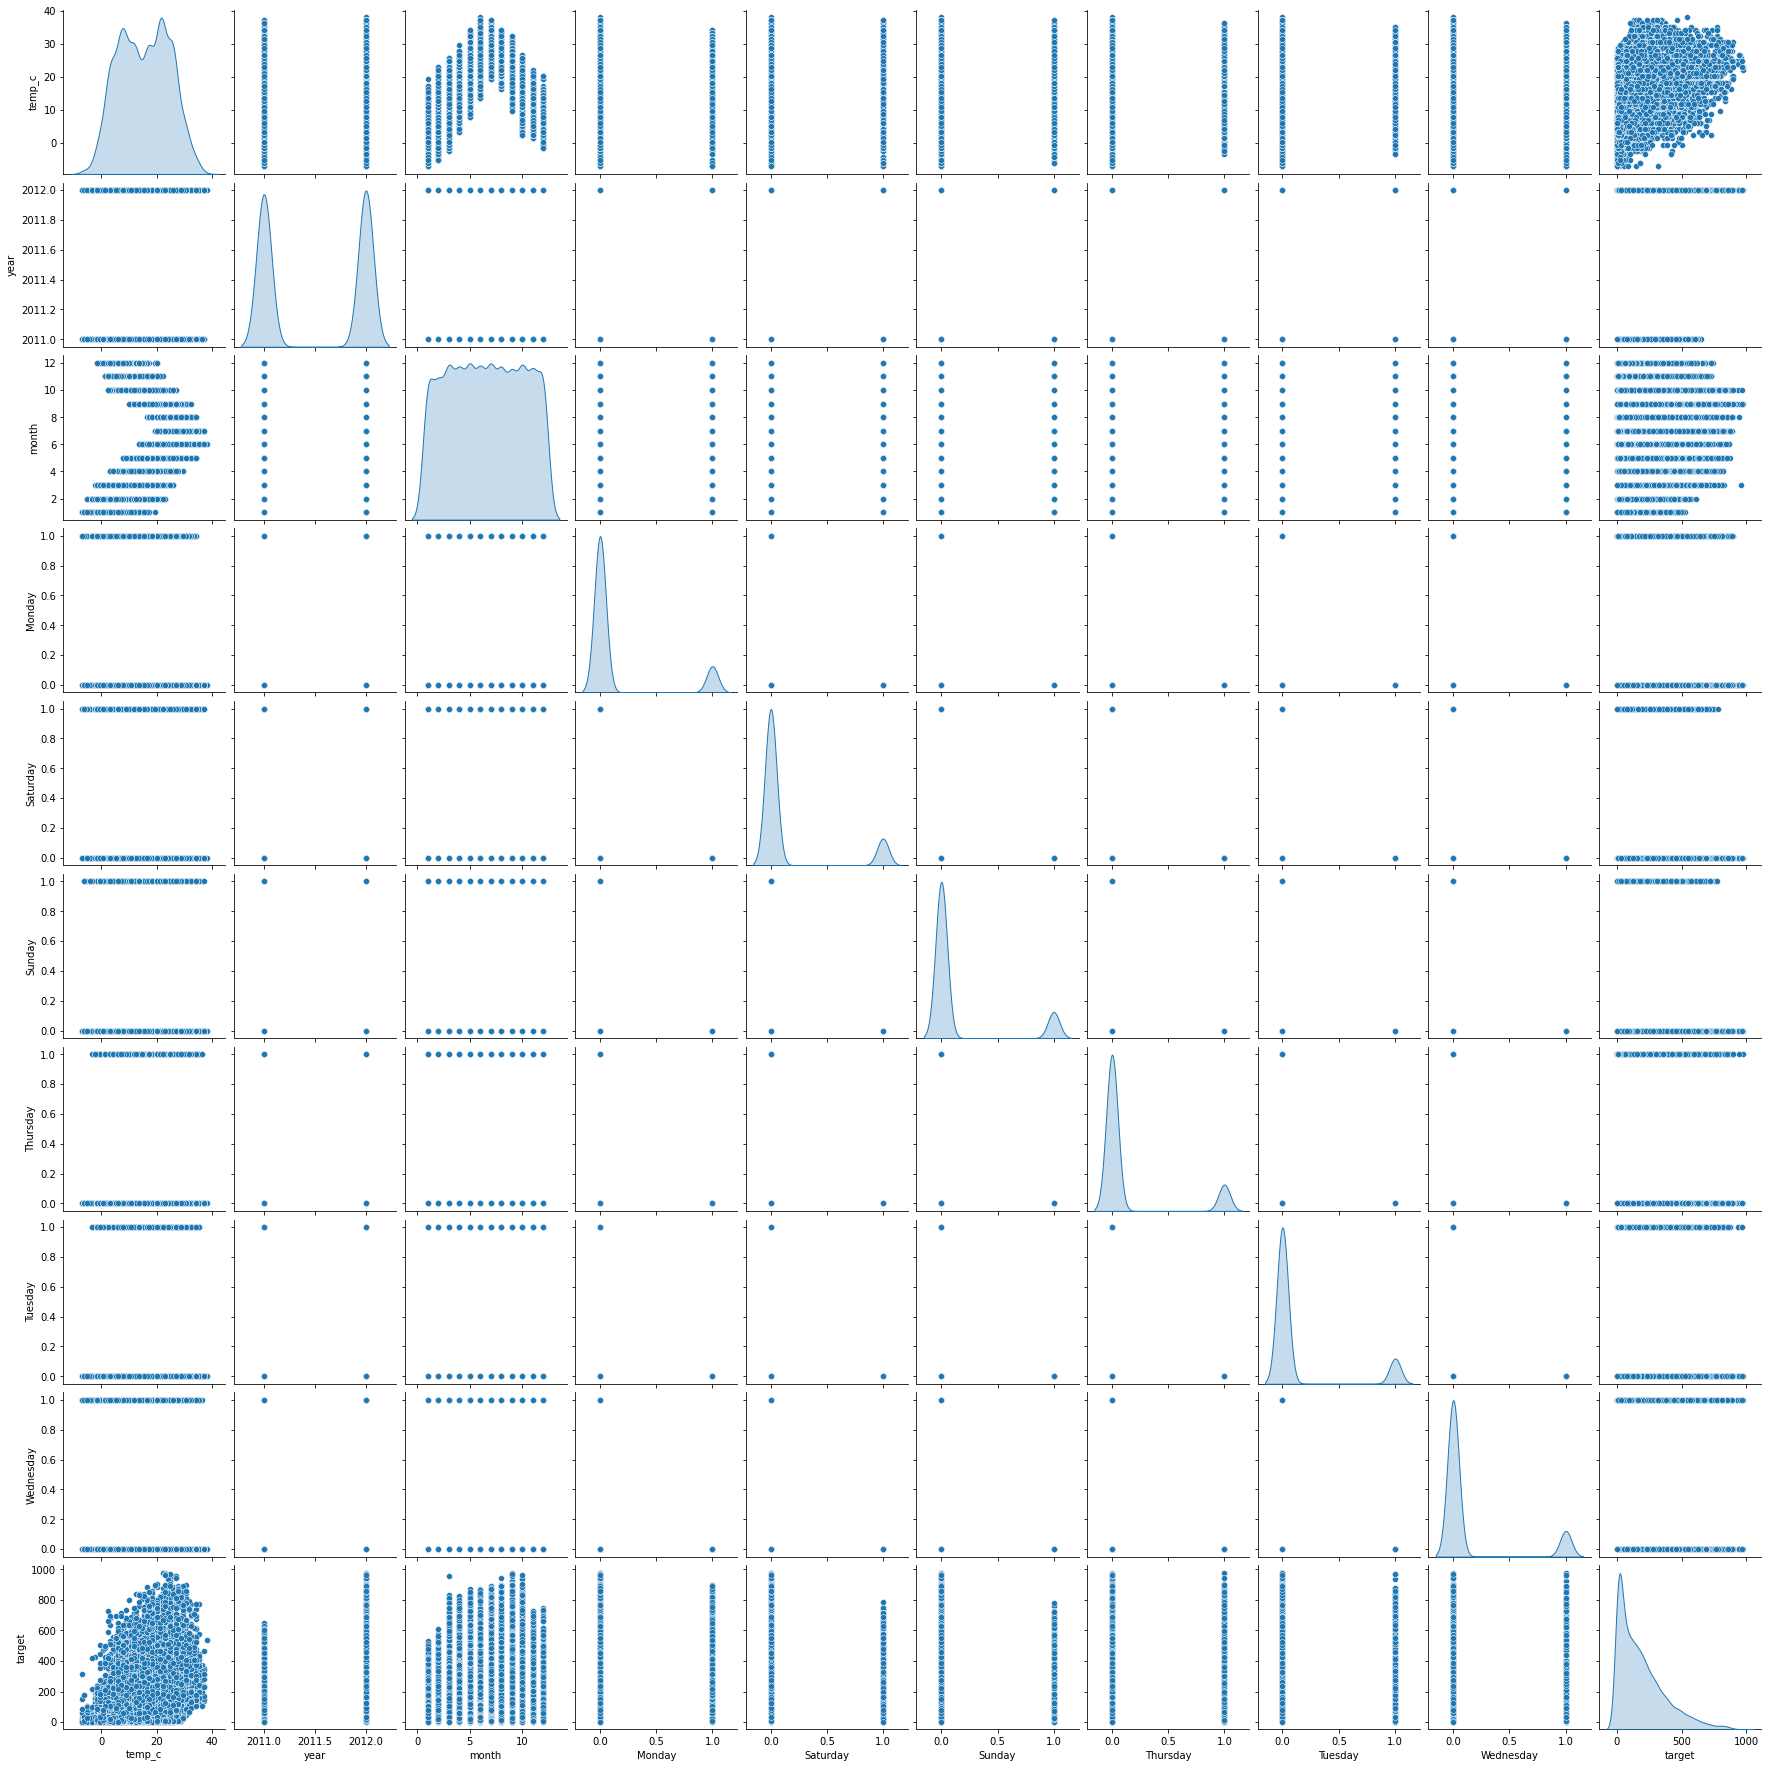

In [ ]:
plt.figure(figsize=(16, 6))

sns.pairplot(train_dataset[[
#'season',
#'hr',
#'holiday',
#'workingday',
#'weathersit',
#'hum',
#'windspeed',
'temp_c',
#'feels_like_c',
#'casual',
#'registered',
'year',
'month',
'Monday',
'Saturday',
'Sunday',
'Thursday',
'Tuesday',
'Wednesday',
#  'year_encoded',
'target'
]], diag_kind='kde')

### Split features from labels

Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('target')
test_labels = test_features.pop('target')

### Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
season,2.502410,1.107308
hr,11.567360,6.909993
holiday,0.028699,0.166965
workingday,0.682299,0.465599
weathersit,1.430555,0.642828
hum,0.628882,0.192952
windspeed,12.732504,8.211298
temp_c,15.346590,9.027290
feels_like_c,15.389231,11.310380
casual,35.711861,49.531112


#### The Normalization layer
The preprocessing.Normalization layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [ ]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()

Then .adapt() it to the data:

In [ ]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer.

In [ ]:
train_features

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,year,month,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,year_encoded
3439,2,5,0,0,1,0.88,15,18.32,18.9998,4,3,2011,5,0,1,0,0,0,0,0
6542,4,4,0,1,1,0.88,0,12.68,13.0004,1,4,2011,10,0,0,0,0,0,1,0
15470,4,19,0,1,1,0.51,9,12.68,13.0004,81,662,2012,10,0,0,0,1,0,0,1
9851,1,11,1,0,1,0.48,24,4.22,-0.9982,45,163,2012,2,1,0,0,0,0,0,1
12640,2,21,0,1,1,0.50,7,23.02,24.9992,83,250,2012,6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14538,3,23,0,0,3,0.89,6,23.02,22.9994,53,70,2012,9,0,0,1,0,0,0,1
9210,1,16,0,1,1,0.71,9,10.80,11.0006,35,243,2012,1,0,0,0,0,1,0,1
1436,1,3,0,0,2,0.87,13,6.10,3.0014,0,2,2011,3,0,1,0,0,0,0,0
177,1,16,0,0,1,0.29,30,0.46,-6.9976,8,68,2011,1,0,1,0,0,0,0,0


### Linear regression

Before building a DNN model, start with a linear regression.



#### One Variable

Start with a single-variable linear regression, to predict 'target' from 'temp_c'.

Training a model with tf.keras typically starts by defining the model architecture.

In this case use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input temp_c.
* Apply a linear transformation (y=mx+b) to produce 1 output using layers.Dense.
The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First create the 'temp_c' Normalization layer:

In [ ]:
temp_c = np.array(train_features['temp_c'])

temp_c_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=[1,])
temp_c_normalizer.adapt(temp_c)

Build the sequential model:

In [ ]:
temp_c_model = tf.keras.Sequential([
    temp_c_normalizer,
    layers.Dense(units=1)
])

temp_c_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict 'target' from 'temp_c'.

Run the untrained model on the first 10 'temp_c' values. The output won't be good, but you'll see that it has the expected shape, (10,1):

In [ ]:
temp_c_model.predict(temp_c[:10])

array([[ 0.496],
       [-0.445],
       [-0.445],
       [-1.857],
       [ 1.281],
       [-1.23 ],
       [-1.544],
       [ 1.595],
       [ 0.026],
       [-1.23 ]], dtype=float32)

Once the model is built, configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).

In [ ]:
temp_c_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use Model.fit() to execute the training:

In [ ]:
%%time
history = temp_c_model.fit(
    train_features['temp_c'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 30.2 s, sys: 3.03 s, total: 33.2 s
Wall time: 24.8 s


Visualize the model's training progress using the stats stored in the history object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,121.612267,125.838966,95
96,121.610527,125.837524,96
97,121.615456,125.836266,97
98,121.615372,125.841850,98
99,121.614693,125.843376,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [temp_c]')
  plt.legend()
  plt.grid(True)

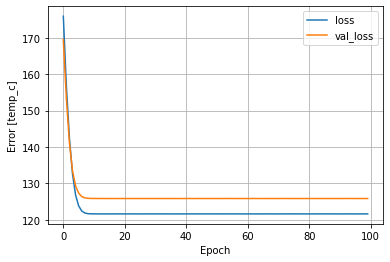

In [ ]:
plot_loss(history)

Collect the results on the test set, for later:

In [ ]:
test_results = {}

test_results['temp_c_model'] = temp_c_model.evaluate(
    test_features['temp_c'],
    test_labels, verbose=0)

SInce this is a single variable regression it's easy to look at the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = temp_c_model.predict(x)

In [ ]:
def plot_temp_c(x, y):
  plt.scatter(train_features['temp_c'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('temp_c')
  plt.ylabel('target')
  plt.legend()

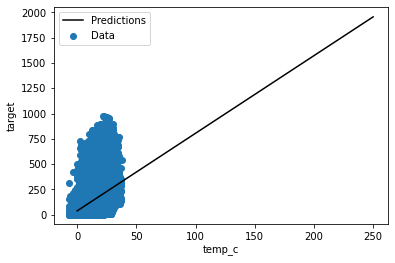

In [ ]:
plot_temp_c(x,y)

#### Multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same  except that  is a matrix and  is a vector.

This time use the Normalization layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call this model on a batch of inputs, it produces units=1 outputs for each example.

In [ ]:
linear_model.predict(train_features[:10])

array([[-0.672],
       [ 1.22 ],
       [-1.07 ],
       [-0.262],
       [-0.74 ],
       [-0.046],
       [ 0.912],
       [-0.283],
       [-1.183],
       [ 0.721]], dtype=float32)

When you call the model it's weight matrices will be built. Now you can see that the kernel (the m in y=mx+b) has a shape of (20,1).

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(20, 1) dtype=float32, numpy=
array([[ 0.495],
       [ 0.027],
       [ 0.279],
       [-0.175],
       [ 0.282],
       [-0.165],
       [-0.238],
       [ 0.036],
       [ 0.153],
       [-0.095],
       [-0.033],
       [-0.175],
       [-0.476],
       [-0.291],
       [-0.293],
       [ 0.347],
       [-0.107],
       [ 0.418],
       [ 0.315],
       [-0.273]], dtype=float32)>

Use the same compile and fit calls as for the single input horsepower model:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 33.9 s, sys: 3.25 s, total: 37.1 s
Wall time: 27.3 s


Using all the inputs achieves a much lower training and validation error than the temp_c model:

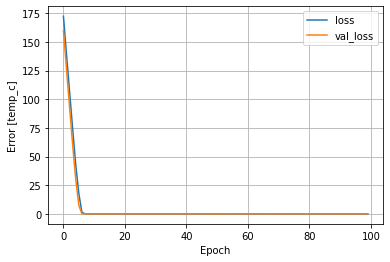

In [ ]:
plot_loss(history)

Collect the results on the test set, for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

### A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

The normalization layer.
Two hidden, nonlinear, Dense layers using the relu nonlinearity.
A linear single-output layer.
Both will use the same training procedure so the compile method is included in the build_and_compile_model function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

#### One Variable

Start with a DNN model for a single input: "temp_c"

In [ ]:
dnn_temp_c_model = build_and_compile_model(temp_c_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_temp_c_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [ ]:
%%time
history = dnn_temp_c_model.fit(
    train_features['temp_c'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 44.2 s, sys: 4.05 s, total: 48.3 s
Wall time: 34.1 s


In [ ]:
This model does slightly better than the linear-temp_c model.

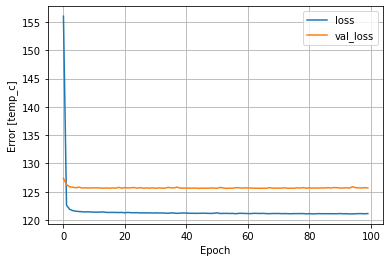

In [ ]:
plot_loss(history)

If you plot the predictions as a function of temp_c, you'll see how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_temp_c_model.predict(x)

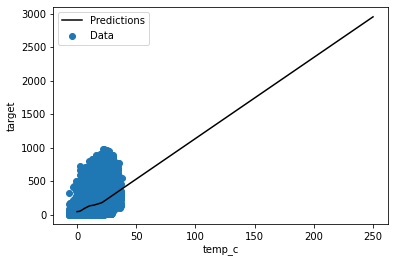

In [ ]:
plot_temp_c(x, y)

Collect the results on the test set, for later:

In [ ]:
test_results['dnn_temp_c_model'] = dnn_temp_c_model.evaluate(
    test_features['temp_c'], test_labels,
    verbose=0)

#### Full Model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 20)                41        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,610
Trainable params: 5,569
Non-trainable params: 41
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 47.6 s, sys: 4.54 s, total: 52.2 s
Wall time: 36.2 s


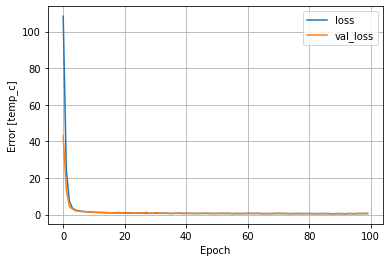

In [ ]:
plot_loss(history)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

### Performance

Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
temp_c_model,120.819336
linear_model,0.105470
dnn_temp_c_model,120.599739
dnn_model,0.802374


These results match the validation error seen during training.

#### Make predictions

Finally, predict have a look at the errors made by the model when making predictions on the test set:

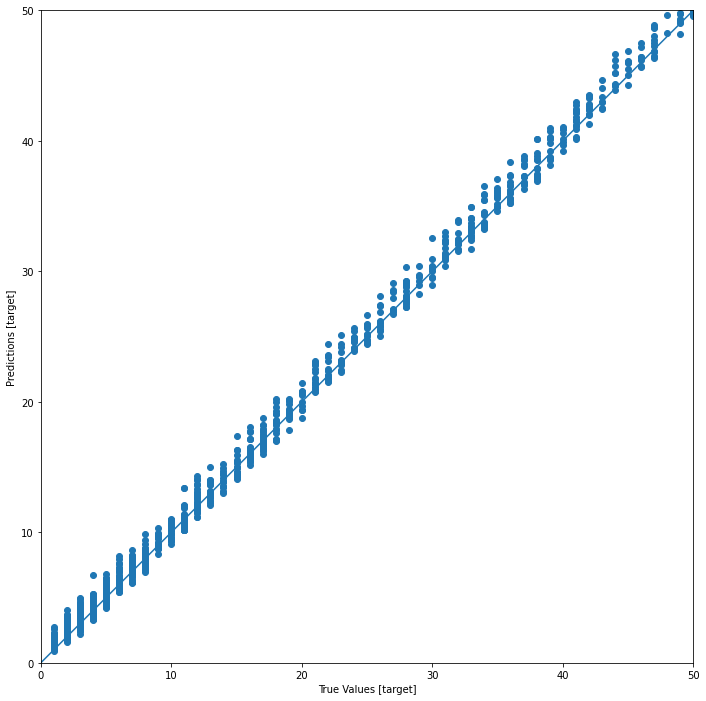

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

plt.figure(figsize=(16, 12))

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [target]')
plt.ylabel('Predictions [target]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It looks like the model predicts reasonably well.

Now take a look at the error distribution:

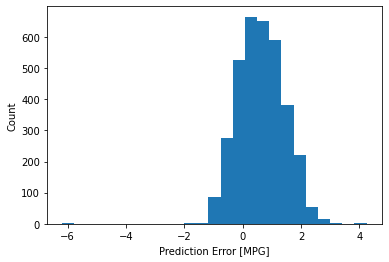

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model save it for later use:

In [ ]:
dnn_model.save('dnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dnn_model/assets


# **Questions**:



*   Why get_dummies doesn't work on month column?



In [ ]:
useful_bikes['month_encoded'] = pd.get_dummies(useful_bikes.month, prefix='', prefix_sep='', drop_first=True)

ValueError: ignored



*   Do we need to get dummies for all, year, month, day of week? Or only for vales that are not written as numbers?





*   What do 

    \- casual: count of casual users 

    \- registered: count of registered users 

columns represent? Is that the number of bicycle rentals for a given day?


Yes




*   What does this line of code mean x = tf.linspace(0.0, 250, 251), why 250 and 251?



*  What do lims do?


test_predictions = dnn_model.predict(test_features).flatten()

plt.figure(figsize=(16, 12))

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [target]')
plt.ylabel('Predictions [target]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

* Does the error need to be normally distributed?